In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import wfdb
import pylab 
import pandas as pd

### Show sample record

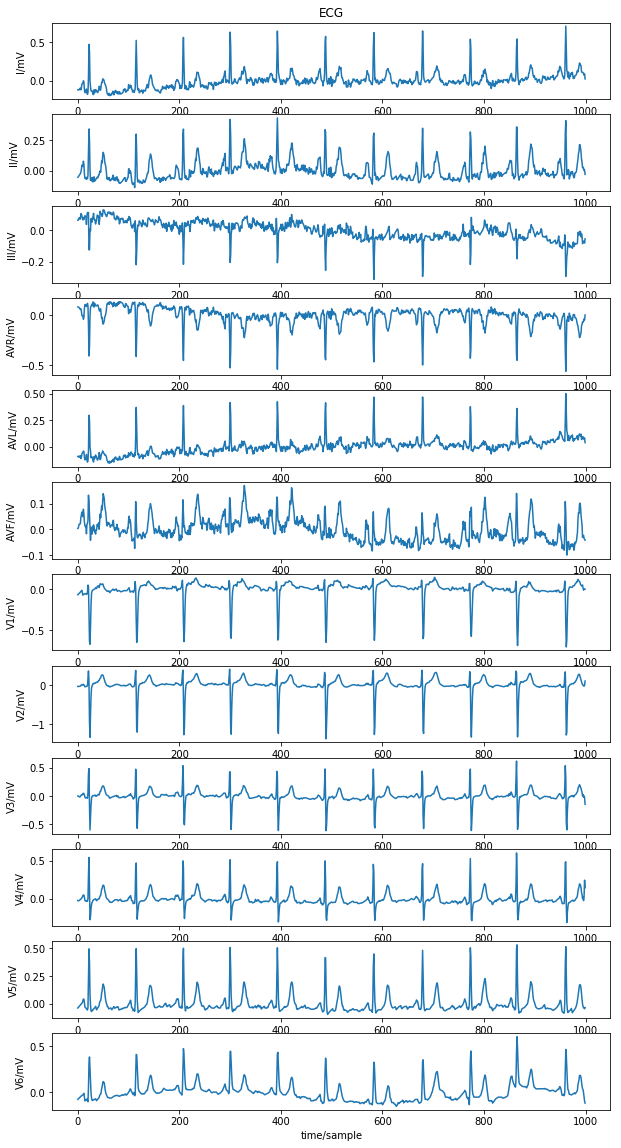

In [2]:
record = wfdb.rdrecord('ptb/records100/00000/00001_lr') 
fig1 = wfdb.plot_wfdb(record=record, title='ECG', figsize=(10,20), return_fig=True)
  
fig1.savefig('test.png', dpi=100)    

### Import Patients Data

In [3]:
df = pd.read_csv("./ptb/ptbxl_database.csv")

In [4]:
df.head(1)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr


In [5]:
df.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

### Since we don't need all columns, I will take only the below

In [6]:
df_copy = df[['ecg_id','patient_id', 'scp_codes', 'filename_lr', 'filename_hr']]

In [7]:
df_copy.head(1)

,ecg_id,patient_id,scp_codes,filename_lr,filename_hr
0,1,15709.0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",records100/00000/00001_lr,records500/00000/00001_hr


In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837 entries, 0 to 21836
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ecg_id       21837 non-null  int64  
 1   patient_id   21837 non-null  float64
 2   scp_codes    21837 non-null  object 
 3   filename_lr  21837 non-null  object 
 4   filename_hr  21837 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 853.1+ KB


### Seems we have no null values

### We need to split the scp_code, to take only the subclass

In [9]:
df_copy["scp_codes"][0]


"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}"

In [10]:
df_copy.head()

,ecg_id,patient_id,scp_codes,filename_lr,filename_hr
0,1,15709.0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,"{'NORM': 80.0, 'SBRAD': 0.0}",records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00005_lr,records500/00000/00005_hr


### Check the classes available

In [11]:
df_classes = pd.read_csv("./ptb/scp_statements.csv")

In [12]:
df_classes.columns

Index(['Unnamed: 0', 'description', 'diagnostic', 'form', 'rhythm',
       'diagnostic_class', 'diagnostic_subclass', 'Statement Category',
       'SCP-ECG Statement Description', 'AHA code', 'aECG REFID', 'CDISC Code',
       'DICOM Code'],
      dtype='object')

In [13]:
df_classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     71 non-null     object 
 1   description                    71 non-null     object 
 2   diagnostic                     44 non-null     float64
 3   form                           19 non-null     float64
 4   rhythm                         12 non-null     float64
 5   diagnostic_class               44 non-null     object 
 6   diagnostic_subclass            44 non-null     object 
 7   Statement Category             71 non-null     object 
 8   SCP-ECG Statement Description  71 non-null     object 
 9   AHA code                       37 non-null     float64
 10  aECG REFID                     23 non-null     object 
 11  CDISC Code                     13 non-null     object 
 12  DICOM Code                     13 non-null     objec

In [14]:
df_classes = df_classes[['diagnostic_class', 'diagnostic_subclass', 'description']]

In [15]:
df_classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   diagnostic_class     44 non-null     object
 1   diagnostic_subclass  44 non-null     object
 2   description          71 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [16]:
df_classes.dropna(inplace=True)

In [17]:
df_classes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   diagnostic_class     44 non-null     object
 1   diagnostic_subclass  44 non-null     object
 2   description          44 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [18]:

df_classes.head()

,diagnostic_class,diagnostic_subclass,description
0,STTC,STTC,non-diagnostic T abnormalities
1,STTC,NST_,non-specific ST changes
2,STTC,STTC,digitalis-effect
3,STTC,STTC,long QT-interval
4,NORM,NORM,normal ECG


In [19]:
classes ={}
for index, row in df_classes.iterrows():
    #print(row['diagnostic_class'])
    #print(row['diagnostic_subclass'])
    sub_class = row['diagnostic_subclass']
    cls = row['diagnostic_class']
    
    classes[sub_class] = cls
   
    #break
    
print("available class/subclass")  
print(len(classes))   
print(classes)  


available class/subclass
23
{'STTC': 'STTC', 'NST_': 'STTC', 'NORM': 'NORM', 'IMI': 'MI', 'AMI': 'MI', 'LVH': 'HYP', 'LAFB/LPFB': 'CD', 'ISC_': 'STTC', 'IRBBB': 'CD', '_AVB': 'CD', 'IVCD': 'CD', 'ISCA': 'STTC', 'CRBBB': 'CD', 'CLBBB': 'CD', 'LAO/LAE': 'HYP', 'ISCI': 'STTC', 'LMI': 'MI', 'RVH': 'HYP', 'RAO/RAE': 'HYP', 'WPW': 'CD', 'ILBBB': 'CD', 'SEHYP': 'HYP', 'PMI': 'MI'}


### Map each sub class to its corresponding class

In [20]:
df_copy["cls"] =None
df_copy['sub_class'] = None


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
for index, row in df_copy.iterrows():
    p_id = row["patient_id"]
    scp_codes = row['scp_codes']
    codes = scp_codes.split("\'")
    cls = ""
    sub_class = ""
    #print(codes)
    #check if it has a superclass
    for code in codes:
        #print(code)

        if code in classes.keys():
            if cls == "":
                cls = classes[code]
            else:
                cls = cls + ":" + classes[code]
            if sub_class =="":
                sub_class = code
            else:
                sub_class = sub_class + ":" + code
    print(p_id)
    df_copy['sub_class'][index] = sub_class
    df_copy['cls'][index] = cls
    
    #break



15709.0
13243.0
20372.0
17014.0
17448.0
19005.0
16193.0
11275.0
18792.0
9456.0
11243.0
11031.0
19953.0
12925.0
13375.0
10999.0
13619.0
13619.0
11116.0
13619.0
17102.0
20978.0
13619.0
9012.0
10962.0
13619.0
10316.0
13619.0
14340.0
19053.0
15348.0
11154.0
20527.0
13619.0
15539.0
8787.0
9123.0
17076.0
13619.0
19501.0
8420.0
8039.0
11315.0
19571.0
18794.0
13180.0
8295.0
13672.0
13958.0
16961.0
16750.0
18153.0
21409.0
16751.0
20191.0
20191.0
16063.0
19424.0
19475.0
15065.0
14660.0
21273.0
15265.0
12864.0
19170.0
11352.0
8520.0
14101.0
8339.0
19173.0
15551.0
14060.0
19987.0
11671.0
18502.0
21214.0
8555.0
14356.0
17529.0
9339.0
20961.0
19645.0
11314.0
19197.0
15904.0
10366.0
17293.0
15275.0
12531.0
8418.0
8305.0
10239.0
10029.0
21731.0
9243.0
21698.0
12761.0
10804.0
18012.0
21404.0
9086.0
9887.0
13722.0
19738.0
18974.0
16066.0
13453.0
11810.0
21312.0
12715.0
13266.0
19832.0
13285.0
14097.0
11591.0
19695.0
16747.0
21192.0
16747.0
11860.0
16747.0
19832.0
12603.0
9730.0
18987.0
17462.0
11926.0
1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


12141.0
7949.0
18577.0
21519.0
13925.0
21519.0
21580.0
18264.0
10783.0
16039.0
15572.0
13163.0
20431.0
16322.0
8608.0
19645.0
15432.0
18301.0
12190.0
20772.0
17115.0
15405.0
19277.0
11651.0
12640.0
17862.0
9601.0
14702.0
16654.0
11567.0
16481.0
8294.0
21409.0
15351.0
19067.0
14355.0
17940.0
10359.0
20848.0
2096.0
7415.0
4867.0
565.0
6078.0
5750.0
4776.0
5471.0
3810.0
6501.0
1595.0
4441.0
706.0
641.0
7662.0
2533.0
2282.0
1480.0
449.0
1027.0
340.0
5662.0
1389.0
5087.0
6211.0
1202.0
437.0
2493.0
641.0
437.0
4715.0
3192.0
7744.0
6410.0
6437.0
6335.0
5489.0
2261.0
4830.0
6581.0
1689.0
5818.0
603.0
7614.0
4845.0
340.0
7852.0
3974.0
3830.0
2632.0
3327.0
2367.0
3713.0
3242.0
6348.0
640.0
6590.0
1316.0
4302.0
3516.0
1110.0
4113.0
1671.0
380.0
2046.0
2034.0
1318.0
640.0
4188.0
5115.0
3825.0
6044.0
636.0
603.0
5017.0
6519.0
3746.0
4807.0
3023.0
2275.0
4417.0
2065.0
3268.0
449.0
3498.0
7479.0
5945.0
15264.0
5779.0
7851.0
4004.0
1491.0
1431.0
565.0
449.0
1848.0
7592.0
5819.0
5304.0
20919.0
13022.0


5755.0
3452.0
4437.0
599.0
2118.0
1587.0
864.0
7141.0
3392.0
14573.0
3411.0
7346.0
19213.0
15726.0
4789.0
556.0
2281.0
3143.0
20956.0
16574.0
20225.0
556.0
7824.0
11710.0
1614.0
5378.0
515.0
3012.0
7568.0
7809.0
6003.0
1766.0
12549.0
2271.0
19102.0
5539.0
14929.0
2408.0
6068.0
1147.0
3113.0
3555.0
7675.0
7046.0
5658.0
5557.0
1443.0
3742.0
15876.0
6001.0
21418.0
5495.0
8316.0
4219.0
7959.0
6995.0
3512.0
5385.0
5243.0
12305.0
4664.0
6096.0
3278.0
12706.0
3027.0
4468.0
3354.0
1723.0
515.0
5003.0
17507.0
2638.0
1811.0
1078.0
14886.0
3743.0
5715.0
5233.0
454.0
6034.0
17828.0
4992.0
8804.0
2352.0
3245.0
6900.0
6549.0
7898.0
7909.0
710.0
9311.0
3283.0
12084.0
2379.0
4640.0
16905.0
6528.0
7424.0
4841.0
454.0
1391.0
3119.0
5249.0
18986.0
5479.0
1930.0
555.0
7559.0
7169.0
2564.0
7625.0
6755.0
2557.0
7573.0
9960.0
3423.0
6207.0
11283.0
5086.0
16596.0
16472.0
21183.0
4540.0
454.0
4139.0
4720.0
3940.0
5967.0
5453.0
17606.0
14708.0
4062.0
7632.0
425.0
2330.0
5429.0
4825.0
1566.0
1214.0
1599.0
2080.0

3816.0
3467.0
4783.0
3856.0
6153.0
5736.0
1554.0
16630.0
17738.0
14139.0
3919.0
6596.0
7494.0
12814.0
3839.0
4853.0
11572.0
7690.0
20537.0
2195.0
7860.0
6654.0
5238.0
4849.0
4901.0
15236.0
13676.0
3601.0
20537.0
4184.0
2292.0
3983.0
843.0
7321.0
11958.0
829.0
5273.0
2401.0
2779.0
5543.0
693.0
6829.0
15204.0
16463.0
7390.0
1069.0
14209.0
1209.0
5182.0
4764.0
12665.0
7701.0
7794.0
2970.0
6895.0
8556.0
17560.0
19435.0
1028.0
17731.0
13029.0
15336.0
11544.0
20537.0
20537.0
18156.0
17370.0
11254.0
9869.0
17337.0
15931.0
13074.0
8508.0
9354.0
10765.0
15696.0
21274.0
19596.0
12892.0
9723.0
9106.0
14371.0
9110.0
20659.0
9106.0
17122.0
20441.0
19190.0
15443.0
9106.0
15808.0
14735.0
20805.0
16812.0
20652.0
20652.0
9100.0
11381.0
8483.0
19545.0
9028.0
20336.0
21195.0
13315.0
20468.0
9849.0
13978.0
14325.0
16279.0
8483.0
14285.0
17667.0
18623.0
8810.0
19331.0
14943.0
17915.0
13701.0
15717.0
12969.0
8810.0
10345.0
13572.0
13098.0
9414.0
12426.0
11468.0
14334.0
13267.0
17801.0
19755.0
17235.0
10243.

9872.0
2813.0
3826.0
13185.0
10799.0
4575.0
18929.0
21465.0
5624.0
1198.0
6441.0
6960.0
15477.0
4474.0
5901.0
6952.0
576.0
6326.0
2850.0
6584.0
4492.0
6292.0
4583.0
5948.0
3110.0
3350.0
440.0
2316.0
5141.0
2303.0
20252.0
648.0
836.0
576.0
13265.0
2615.0
573.0
5164.0
648.0
3536.0
440.0
4381.0
19669.0
428.0
648.0
4969.0
5419.0
428.0
1801.0
1925.0
6931.0
648.0
7881.0
353.0
6381.0
6388.0
2388.0
7443.0
19574.0
3929.0
14425.0
7599.0
2419.0
14892.0
3342.0
13335.0
4337.0
4752.0
20983.0
2679.0
2081.0
7212.0
3829.0
7650.0
7490.0
2922.0
1926.0
4434.0
5040.0
3315.0
16534.0
5953.0
2576.0
2805.0
1183.0
7405.0
1022.0
2662.0
396.0
13836.0
5394.0
2728.0
17307.0
14693.0
20939.0
5705.0
18464.0
20298.0
21429.0
16786.0
18636.0
1897.0
18532.0
8390.0
21627.0
10373.0
20642.0
21102.0
21197.0
12029.0
18467.0
13823.0
8459.0
15533.0
11103.0
10825.0
18463.0
16536.0
8358.0
9403.0
8459.0
9996.0
19221.0
16333.0
20032.0
13873.0
8611.0
21008.0
17896.0
11728.0
8423.0
11112.0
12354.0
11807.0
15647.0
10263.0
17410.0
20956

17599.0
9303.0
19996.0
21520.0
20105.0
21601.0
19037.0
14803.0
15306.0
11960.0
16453.0
20105.0
20105.0
20105.0
16426.0
10605.0
20329.0
15160.0
17734.0
9148.0
19721.0
10748.0
16526.0
16684.0
9504.0
20770.0
19318.0
20105.0
18768.0
12653.0
16891.0
20205.0
21028.0
16038.0
9874.0
8839.0
8839.0
11630.0
7988.0
18436.0
9913.0
12862.0
8992.0
16038.0
20433.0
16684.0
17277.0
13312.0
12289.0
21166.0
18054.0
17900.0
16727.0
20175.0
8881.0
17294.0
9426.0
15509.0
13161.0
21314.0
7974.0
8169.0
10854.0
9355.0
17125.0
16243.0
8276.0
16949.0
15148.0
15528.0
13264.0
9249.0
14004.0
14379.0
19194.0
19663.0
19508.0
9739.0
12653.0
9390.0
18772.0
9682.0
17054.0
11011.0
16526.0
15133.0
12471.0
20734.0
10321.0
15624.0
14304.0
18646.0
13329.0
14545.0
9782.0
11245.0
15557.0
19006.0
14119.0
21291.0
17479.0
20240.0
10274.0
8633.0
10748.0
14665.0
17125.0
8232.0
14197.0
13550.0
16432.0
14872.0
19125.0
17152.0
14697.0
21137.0
21524.0
21244.0
10282.0
15890.0
20436.0
21314.0
14191.0
19327.0
14012.0
20456.0
21296.0
13041.

4822.0
1057.0
20302.0
3676.0
7912.0
10851.0
7467.0
5204.0
1546.0
6340.0
10240.0
11268.0
5854.0
3499.0
675.0
4146.0
8296.0
17877.0
503.0
8664.0
3435.0
3510.0
6456.0
3486.0
6195.0
14173.0
423.0
6543.0
16529.0
6429.0
5575.0
18682.0
8181.0
10621.0
21445.0
20866.0
3120.0
5567.0
6934.0
6047.0
5165.0
17805.0
3794.0
18997.0
16272.0
5601.0
21020.0
20643.0
10271.0
6608.0
14550.0
18965.0
13517.0
9137.0
20294.0
10571.0
16272.0
18282.0
14039.0
4288.0
8384.0
4936.0
404.0
19583.0
1817.0
412.0
16834.0
7006.0
14086.0
18666.0
1423.0
2134.0
4314.0
9827.0
5150.0
4796.0
412.0
13335.0
14876.0
1426.0
11692.0
1567.0
2523.0
4934.0
17081.0
4303.0
21401.0
4788.0
4756.0
6367.0
2329.0
455.0
9310.0
4168.0
6564.0
3459.0
2011.0
2846.0
6186.0
7196.0
6540.0
2532.0
11932.0
15999.0
724.0
1803.0
6579.0
18539.0
4490.0
312.0
2381.0
2739.0
781.0
1594.0
15186.0
1781.0
19036.0
20017.0
835.0
7858.0
3356.0
15690.0
6989.0
2074.0
12133.0
8986.0
11767.0
16899.0
14774.0
11513.0
11267.0
959.0
2945.0
12198.0
16067.0
12816.0
8035.0
648

20599.0
11517.0
8236.0
12937.0
13417.0
10122.0
19931.0
1786.0
21070.0
20429.0
14169.0
20396.0
8182.0
20954.0
16125.0
14557.0
17406.0
12495.0
304.0
3933.0
4521.0
11576.0
16513.0
17696.0
304.0
1709.0
3333.0
7519.0
6562.0
16061.0
18428.0
15398.0
19310.0
9892.0
17548.0
14111.0
17183.0
19889.0
21238.0
19418.0
14938.0
19023.0
11840.0
16941.0
8298.0
10012.0
14938.0
14938.0
8978.0
8978.0
11119.0
14850.0
14850.0
12906.0
8191.0
11931.0
16329.0
8681.0
5510.0
6902.0
1979.0
5617.0
3920.0
2423.0
7277.0
4096.0
12404.0
21336.0
1654.0
3384.0
6234.0
12605.0
13461.0
12206.0
13687.0
4335.0
16332.0
3034.0
7323.0
2860.0
21238.0
6111.0
9740.0
490.0
5593.0
3783.0
3262.0
4041.0
12121.0
17353.0
18347.0
20727.0
10687.0
490.0
3719.0
2109.0
6117.0
5773.0
11445.0
7853.0
2242.0
13818.0
4760.0
8831.0
21144.0
17981.0
11456.0
18902.0
10550.0
20673.0
14793.0
2609.0
14822.0
18370.0
20046.0
15585.0
14604.0
10668.0
13526.0
13469.0
20566.0
13323.0
16931.0
16820.0
16859.0
16707.0
14317.0
15703.0
12267.0
17270.0
19498.0
13355

3199.0
7272.0
17244.0
13669.0
4537.0
19536.0
21509.0
14877.0
10066.0
9672.0
11551.0
4925.0
14981.0
8605.0
17937.0
11098.0
10125.0
7258.0
11141.0
4513.0
427.0
6647.0
1185.0
3657.0
1521.0
16657.0
2834.0
1670.0
393.0
12101.0
13104.0
13104.0
15214.0
6953.0
4872.0
1558.0
14877.0
4740.0
10066.0
9259.0
682.0
10519.0
7018.0
18342.0
473.0
5480.0
12835.0
833.0
427.0
2380.0
6413.0
7736.0
1784.0
6879.0
6486.0
2879.0
6287.0
17126.0
8020.0
5718.0
14038.0
2091.0
8982.0
20970.0
6591.0
4541.0
10537.0
8913.0
15298.0
9116.0
6946.0
21585.0
15276.0
7944.0
8186.0
17984.0
3441.0
2511.0
21654.0
11687.0
21637.0
14251.0
18101.0
10011.0
7571.0
13895.0
979.0
15510.0
7062.0
15946.0
4223.0
19561.0
10361.0
11921.0
17145.0
1067.0
14907.0
1679.0
12874.0
14013.0
14251.0
20970.0
14234.0
15894.0
21509.0
13002.0
1199.0
15269.0
2516.0
11955.0
13627.0
1059.0
7646.0
4491.0
11870.0
2027.0
17586.0
6748.0
11412.0
14925.0
1828.0
8001.0
1688.0
14981.0
19701.0
15167.0
14419.0
18879.0
16956.0
1035.0
5599.0
6487.0
17805.0
5194.0
209

15445.0
322.0
14003.0
1854.0
1260.0
1939.0
5245.0
6230.0
7452.0
3745.0
3109.0
21412.0
11395.0
17963.0
14459.0
10509.0
18218.0
11479.0
2812.0
1797.0
1112.0
6563.0
19252.0
3013.0
4446.0
6082.0
329.0
7652.0
5572.0
4158.0
2531.0
1314.0
495.0
12117.0
4418.0
4647.0
4914.0
6165.0
3756.0
6336.0
1932.0
11624.0
5977.0
4423.0
9703.0
7441.0
588.0
2631.0
1397.0
11113.0
13438.0
12041.0
7392.0
4671.0
3505.0
6126.0
918.0
16524.0
607.0
5234.0
952.0
6285.0
3558.0
1386.0
2057.0
1729.0
692.0
7133.0
7190.0
3422.0
3956.0
11962.0
7241.0
769.0
3950.0
18832.0
18043.0
20404.0
7376.0
14393.0
656.0
607.0
1408.0
495.0
3790.0
6009.0
2487.0
12854.0
20795.0
2031.0
5326.0
3335.0
4505.0
656.0
11307.0
2778.0
3557.0
12855.0
1138.0
9496.0
2570.0
7461.0
5649.0
2668.0
344.0
3546.0
3941.0
939.0
3832.0
3884.0
4972.0
4837.0
6527.0
804.0
5083.0
1099.0
7529.0
1347.0
2772.0
7165.0
16668.0
4040.0
4149.0
4634.0
5924.0
4929.0
3957.0
4993.0
20349.0
1910.0
3279.0
12800.0
3543.0
6366.0
4204.0
4033.0
1881.0
6125.0
393.0
4305.0
6630.0
21

14280.0
9317.0
9393.0
11594.0
14027.0
9908.0
20418.0
15939.0
11203.0
21706.0
13169.0
9393.0
8618.0
15710.0
20665.0
15457.0
9861.0
12434.0
20418.0
13780.0
15240.0
14487.0
15404.0
17161.0
10861.0
11582.0
16141.0
11203.0
9666.0
21453.0
12419.0
12246.0
21175.0
13081.0
12879.0
19863.0
9358.0
15520.0
20347.0
20186.0
9661.0
9666.0
14859.0
12616.0
12181.0
10504.0
16313.0
9536.0
13014.0
15326.0
8044.0
9863.0
8194.0
12423.0
20847.0
13202.0
13067.0
13979.0
20790.0
18053.0
12049.0
17504.0
20514.0
19699.0
17421.0
11250.0
19117.0
11557.0
18357.0
18357.0
12114.0
11866.0
11908.0
15108.0
11804.0
14055.0
13132.0
21596.0
21680.0
12049.0
13858.0
18458.0
10460.0
11747.0
9088.0
9097.0
15372.0
16452.0
17470.0
9550.0
13103.0
12880.0
9470.0
14788.0
14788.0
9174.0
21043.0
10610.0
21553.0
9041.0
8743.0
18059.0
17019.0
21650.0
9015.0
18122.0
11295.0
11950.0
15677.0
11404.0
17181.0
20751.0
12284.0
20740.0
13858.0
11553.0
17403.0
13656.0
19525.0
16636.0
17932.0
10357.0
13577.0
8525.0
20303.0
21629.0
8988.0
20418.0


5873.0
7517.0
4656.0
1091.0
7386.0
5942.0
21604.0
17729.0
5363.0
314.0
7330.0
6636.0
3734.0
1867.0
1227.0
2894.0
315.0
5461.0
7403.0
4975.0
6868.0
2262.0
9539.0
2264.0
19035.0
4781.0
10855.0
17953.0
19941.0
19302.0
14048.0
13386.0
10485.0
5379.0
20249.0
11571.0
20950.0
16446.0
4471.0
11253.0
1019.0
16602.0
547.0
6732.0
14365.0
10207.0
13538.0
8735.0
17843.0
7715.0
5878.0
577.0
5269.0
11384.0
472.0
13808.0
5537.0
4476.0
3968.0
367.0
11104.0
6751.0
18096.0
6790.0
3313.0
8491.0
17953.0
14659.0
17134.0
5282.0
5340.0
6317.0
17243.0
7325.0
18307.0
6280.0
14894.0
472.0
10442.0
4126.0
5904.0
10442.0
11499.0
11992.0
13192.0
18918.0
18277.0
16603.0
20785.0
10306.0
20270.0
19142.0
9136.0
12982.0
3425.0
20478.0
3404.0
2770.0
3738.0
7780.0
335.0
3680.0
367.0
7069.0
11636.0
915.0
13755.0
10442.0
7442.0
11366.0
1286.0
6988.0
20556.0
4790.0
399.0
414.0
3302.0
2687.0
13113.0
13741.0
19539.0
6886.0
5637.0
4573.0
4945.0
21107.0
21672.0
2117.0
20987.0
19728.0
11604.0
3951.0
3383.0
1467.0
20110.0
7365.0
18

10592.0
13253.0
13177.0
18380.0
17311.0
9257.0
10389.0
19375.0
8900.0
21749.0
13951.0
21309.0
11990.0
11973.0
20007.0
21470.0
8863.0
19407.0
17422.0
12686.0
18093.0
15149.0
10447.0
13591.0
15606.0
10901.0
12787.0
11041.0
20251.0
21659.0
18582.0
16437.0
12693.0
15013.0
17914.0
14548.0
15182.0
12264.0
11537.0
14913.0
12981.0
9387.0
17942.0
19318.0
11946.0
14006.0
15646.0
8515.0
16662.0
19014.0
14365.0
11297.0
14821.0
20631.0
8235.0
9767.0
19244.0
18025.0
10859.0
14023.0
15389.0
10606.0
5743.0
5548.0
10402.0
5349.0
8845.0
11266.0
11266.0
19207.0
3391.0
14584.0
7702.0
21475.0
11087.0
21505.0
15273.0
16232.0
14102.0
19137.0
14242.0
6962.0
2699.0
10918.0
21664.0
20096.0
19693.0
14648.0
12318.0
13506.0
5395.0
6873.0
403.0
7580.0
2603.0
7685.0
2256.0
7673.0
3360.0
1856.0
7262.0
4421.0
12582.0
7509.0
19068.0
2883.0
6731.0
5106.0
19515.0
15286.0
3578.0
5944.0
1205.0
5155.0
2722.0
6759.0
10597.0
2479.0
3792.0
8110.0
8544.0
4625.0
2836.0
20501.0
10639.0
9004.0
19217.0
19322.0
11492.0
11571.0
16382

4413.0
2619.0
2300.0
18540.0
10059.0
19369.0
6330.0
19295.0
14243.0
15634.0
15356.0
2892.0
13489.0
6796.0
1351.0
4759.0
20452.0
5527.0
7097.0
494.0
5280.0
7411.0
2967.0
3432.0
2839.0
10800.0
9923.0
21211.0
15870.0
15997.0
10384.0
11202.0
7977.0
9678.0
19279.0
19348.0
19348.0
19348.0
19348.0
14063.0
11202.0
19071.0
14357.0
16358.0
20923.0
21452.0
9923.0
11660.0
15930.0
12067.0
7981.0
10374.0
10374.0
10286.0
20589.0
12942.0
10249.0
9799.0
9748.0
13806.0
11012.0
8458.0
17910.0
16256.0
10286.0
17290.0
9970.0
18721.0
14269.0
16318.0
16318.0
12437.0
10374.0
21433.0
9748.0
15581.0
11225.0
9893.0
21375.0
20924.0
14089.0
21216.0
14767.0
14215.0
19898.0
21184.0
11723.0
20597.0
17694.0
17905.0
18618.0
7960.0
12954.0
18363.0
17290.0
17356.0
19233.0
18963.0
9500.0
17397.0
18581.0
8921.0
17631.0
17814.0
10911.0
16283.0
14778.0
10164.0
16126.0
9467.0
9754.0
20169.0
20173.0
21018.0
12739.0
9310.0
10200.0
17725.0
14627.0
8921.0
21756.0
7986.0
14888.0
11723.0
13799.0
20093.0
18624.0
14174.0
21705.0
1729

4692.0
4177.0
2022.0
1169.0
6805.0
9080.0
12749.0
1783.0
4357.0
6248.0
6048.0
10455.0
9777.0
17829.0
15005.0
11512.0
19629.0
19430.0
19430.0
19430.0
11473.0
21211.0
15679.0
18664.0
8079.0
13012.0
8867.0
14499.0
17966.0
8956.0
14053.0
16155.0
12904.0
12765.0
18604.0
18674.0
14434.0
14250.0
20886.0
9768.0
16745.0
17340.0
8666.0
11847.0
10176.0
9547.0
12422.0
12498.0
14407.0
9976.0
11215.0
20875.0
18805.0
14608.0
5544.0
21339.0
16656.0
12161.0
11794.0
19768.0
15487.0
19415.0
10224.0
11815.0
21398.0
18716.0
14341.0
19090.0
9738.0
14364.0
19979.0
20793.0
8460.0
9021.0
11942.0
17960.0
11826.0
20187.0
10956.0
11815.0
17640.0
13059.0
13559.0
11376.0
16459.0
18930.0
19917.0
19641.0
7168.0
2613.0
11983.0
15132.0
16556.0
13652.0
17248.0
8241.0
8884.0
12510.0
14199.0
12536.0
4680.0
10752.0
12503.0
6221.0
8479.0
2135.0
4530.0
1940.0
16658.0
7465.0
2910.0
3994.0
3752.0
4511.0
1607.0
16025.0
5432.0
18553.0
604.0
2374.0
12826.0
7217.0
1947.0
5782.0
17248.0
2958.0
6652.0
7242.0
3801.0
4092.0
21607.0
62

17004.0
20532.0
13069.0
9443.0
15658.0
11709.0
17322.0
9798.0
21782.0
11850.0
18074.0
14408.0
14361.0
21646.0
13126.0
20087.0
18035.0
10934.0
17538.0
8255.0
12958.0
16477.0
18593.0
11634.0
19865.0
14075.0
13219.0
8952.0
12373.0
17004.0
18207.0
18008.0
17792.0
8952.0
8783.0
15262.0
20521.0
20276.0
11539.0
17581.0
11303.0
12638.0
19911.0
17407.0
19072.0
16050.0
11472.0
16619.0
19842.0
19469.0
14043.0
11472.0
12363.0
21041.0
13040.0
17029.0
12235.0
12532.0
10007.0
13069.0
13726.0
17815.0
8514.0
14192.0
13101.0
21088.0
9245.0
13753.0
13215.0
16522.0
11879.0
10168.0
8990.0
15377.0
11918.0
14846.0
13134.0
11584.0
16433.0
21220.0
19127.0
21646.0
11735.0
9336.0
14639.0
17002.0
13094.0
18325.0
14640.0
19469.0
18286.0
13848.0
18389.0
18911.0
18020.0
11937.0
20439.0
20701.0
11472.0
10391.0
17419.0
16299.0
9935.0
20034.0
16295.0
16218.0
11435.0
13395.0
18507.0
18029.0
8946.0
8102.0
18115.0
10140.0
20273.0
17002.0
19085.0
15377.0
14005.0
8496.0
19282.0
18489.0
14187.0
15356.0
10527.0
21456.0
17901.

16253.0
11892.0
12279.0
15370.0
18725.0
9855.0
17537.0
18137.0
17156.0
3964.0
5134.0
2421.0
1226.0
4834.0
1782.0
4025.0
7002.0
16518.0
3136.0
4604.0
7295.0
1804.0
16001.0
19303.0
1438.0
7086.0
15090.0
6408.0
13932.0
21402.0
9879.0
10981.0
10981.0
7634.0
7790.0
2244.0
12178.0
4430.0
4262.0
21786.0
1495.0
5706.0
3344.0
19078.0
451.0
3772.0
4701.0
3318.0
5452.0
5823.0
19164.0
11862.0
18875.0
15781.0
16201.0
13289.0
18990.0
11088.0
15202.0
8068.0
9143.0
15229.0
20706.0
18146.0
18137.0
14163.0
15417.0
20108.0
17790.0
9814.0
14079.0
12810.0
12810.0
12279.0
16258.0
16372.0
14991.0
11360.0
11088.0
14345.0
21491.0
15674.0
19813.0
13071.0
9710.0
16181.0
10193.0
8329.0
18852.0
11600.0
12537.0
16258.0
10640.0
8443.0
9595.0
14467.0
21182.0
19857.0
20997.0
21073.0
16975.0
15658.0
11396.0
15271.0
8838.0
13523.0
11061.0
8024.0
13283.0
17624.0
20172.0
9850.0
18475.0
18475.0
11862.0
21349.0
11894.0
14416.0
11133.0
17146.0
14969.0
15910.0
13709.0
10260.0
19787.0
13509.0
13597.0
20157.0
14828.0
10967.0
17

9469.0
14294.0
9655.0
15213.0
17515.0
14628.0
12494.0
15776.0
9492.0
10152.0
13272.0
21791.0
20518.0
19412.0
9655.0
17515.0
19986.0
15995.0
20399.0
12533.0
11658.0
9349.0
11586.0
14294.0
13623.0
20528.0
21482.0
8364.0
14515.0
7994.0
11618.0
19660.0
10363.0
21615.0
15776.0
13697.0
12687.0
11858.0
14529.0
16145.0
8616.0
18906.0
16904.0
16349.0
17041.0
15995.0
9438.0
20798.0
18382.0
20528.0
21331.0
12556.0
20072.0
15451.0
16010.0
17365.0
18657.0
16215.0
21525.0
12556.0
11781.0
19791.0
18639.0
20391.0
17515.0
20541.0
21602.0
19335.0
9052.0
17943.0
21602.0
9460.0
16633.0
16964.0
20528.0
21717.0
12379.0
19773.0
21399.0
20371.0
12386.0
21591.0
15079.0
13325.0
21236.0
11123.0
8070.0
18530.0
20455.0
11409.0
17515.0
21602.0
17218.0
17427.0
18982.0
20242.0
10968.0
19703.0
11596.0
9045.0
8950.0
21318.0
19962.0
20391.0
20150.0
16375.0
19321.0
15911.0
21260.0
14081.0
16215.0
17802.0
12494.0
17357.0
10371.0
19092.0
18382.0
19703.0
14363.0
20150.0
19847.0
10136.0
13604.0
12468.0
19760.0
13234.0
17922.

8220.0
19560.0
13336.0
11115.0
17444.0
19849.0
17686.0
9193.0
8428.0
8220.0
8758.0
11316.0
19736.0
13409.0
16480.0
11231.0
19229.0
21707.0
8455.0
21054.0
12947.0
8869.0
14901.0
17672.0
16981.0
16423.0
14314.0
18450.0
21784.0
16300.0
11004.0
20414.0
20873.0
12947.0
11115.0
18482.0
21440.0
18167.0
16379.0
18283.0
11420.0
8272.0
13544.0
17359.0
8117.0
11274.0
8914.0
13336.0
11957.0
8472.0
8117.0
17001.0
8836.0
19026.0
10622.0
13834.0
15928.0
10979.0
12156.0
19119.0
19118.0
18589.0
18930.0
10792.0
8778.0
8621.0
11986.0
8117.0
13579.0
13632.0
9614.0
13056.0
19982.0
14637.0
9406.0
15695.0
10992.0
20624.0
9733.0
15299.0
11073.0
14616.0
13752.0
10694.0
15452.0
21219.0
10827.0
14966.0
10827.0
11968.0
20715.0
9537.0
16157.0
8573.0
9248.0
13165.0
8466.0
13905.0
13342.0
12156.0
21128.0
17080.0
8778.0
14616.0
11048.0
13727.0
8794.0
9733.0
21663.0
16609.0
14263.0
19334.0
15318.0
13364.0
9733.0
21022.0
17444.0
14863.0
21789.0
18773.0
9384.0
11475.0
19241.0
13907.0
14748.0
14657.0
11871.0
10087.0
1797

In [4]:
df_copy.to_csv("ptb_mapped.csv", index=False)

In [2]:
df_copy = pd.read_csv("ptb_mapped.csv")

In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837 entries, 0 to 21836
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ecg_id       21837 non-null  int64  
 1   patient_id   21837 non-null  float64
 2   scp_codes    21837 non-null  object 
 3   filename_lr  21837 non-null  object 
 4   filename_hr  21837 non-null  object 
 5   cls          17330 non-null  object 
 6   sub_class    17330 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [4]:
df_copy["cls"].value_counts()

NORM                 9143
MI                   2161
CD                   1733
HYP                   878
HYP:STTC              715
                     ... 
STTC:HYP:HYP:STTC       1
CD:HYP:HYP:STTC         1
CD:CD:HYP               1
NORM:CD:CD              1
STTC:CD:STTC            1
Name: cls, Length: 75, dtype: int64

### split the dataframe 

In [5]:
def save_row(file_path, img_path):
    record = wfdb.rdrecord(file_path) 
    fig1 = wfdb.plot_wfdb(record=record, title='ECG', figsize=(10,20), return_fig=True)
    fig1.savefig(img_path, dpi=100)
    plt.close('all')

In [6]:
def save_imgs(df1):
    for index, row in df1.iterrows():
        #print(row["cls"])
        #print(row["scp_codes"])
        #print(row["filename_lr"])
        print("ECG_ID: " , row["ecg_id"])
        file_path = "ptb/" + row["filename_lr"]
        img_path= "ptb/classified/" + row["cls"] + "/"+str(row["ecg_id"])+".png"
        save_row(file_path, img_path)
        #break

In [7]:
df_norm = df_copy.query("cls == 'NORM'")
df_MI = df_copy.query("cls == 'MI'")

In [8]:
df_norm.head()

,ecg_id,patient_id,scp_codes,filename_lr,filename_hr,cls,sub_class
0,1,15709.0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",records100/00000/00001_lr,records500/00000/00001_hr,NORM,NORM
1,2,13243.0,"{'NORM': 80.0, 'SBRAD': 0.0}",records100/00000/00002_lr,records500/00000/00002_hr,NORM,NORM
2,3,20372.0,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00003_lr,records500/00000/00003_hr,NORM,NORM
3,4,17014.0,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00004_lr,records500/00000/00004_hr,NORM,NORM
4,5,17448.0,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00005_lr,records500/00000/00005_hr,NORM,NORM


In [9]:
df_MI.head()

,ecg_id,patient_id,scp_codes,filename_lr,filename_hr,cls,sub_class
7,8,11275.0,"{'IMI': 35.0, 'ABQRS': 0.0, 'SR': 0.0}",records100/00000/00008_lr,records500/00000/00008_hr,MI,IMI
102,103,13722.0,"{'IMI': 15.0, 'LAFB': 100.0, 'ABQRS': 0.0, 'ST...",records100/00000/00103_lr,records500/00000/00103_hr,MI,IMI
138,139,11121.0,"{'IMI': 100.0, 'SR': 0.0}",records100/00000/00139_lr,records500/00000/00139_hr,MI,IMI
141,142,8159.0,"{'IMI': 15.0, 'SR': 0.0}",records100/00000/00142_lr,records500/00000/00142_hr,MI,IMI
151,152,9796.0,"{'LMI': 50.0, 'ISCIL': 100.0, 'AFIB': 0.0}",records100/00000/00152_lr,records500/00000/00152_hr,MI,LMI


### Below method used to take random sample of the prigional data frame

In [ ]:
start = 0
stop = 4600
for loc in np.arange(4610,17000,10):
    start = stop
    stop = loc
    print("start index: " , start)
    print("stop index:" , stop)
    
    df_part = df_copy.iloc[start:stop,:]
    save_imgs(df_part)
    print("done saving from {} to {}".format(start,stop))
    
    

start index:  4600
stop index: 4610
Patient ID:  20757.0
Patient ID:  19822.0
Patient ID:  11885.0
Patient ID:  8204.0
Patient ID:  15999.0
Patient ID:  20683.0
Patient ID:  10187.0
Patient ID:  12287.0
Patient ID:  11959.0
Patient ID:  16111.0
done saving from 4600 to 4610
start index:  4610
stop index: 4620
Patient ID:  17704.0
Patient ID:  17028.0
Patient ID:  17799.0
Patient ID:  13217.0
Patient ID:  18076.0
Patient ID:  10699.0
Patient ID:  11599.0
Patient ID:  15456.0
Patient ID:  8492.0
Patient ID:  15564.0
done saving from 4610 to 4620
start index:  4620
stop index: 4630
Patient ID:  12609.0
Patient ID:  21067.0
Patient ID:  17313.0
Patient ID:  8492.0
Patient ID:  10505.0
Patient ID:  9602.0
Patient ID:  10820.0
Patient ID:  21530.0
Patient ID:  14798.0
Patient ID:  21143.0
done saving from 4620 to 4630
start index:  4630
stop index: 4640
Patient ID:  13296.0
Patient ID:  11527.0
Patient ID:  11834.0
Patient ID:  20132.0
Patient ID:  21293.0
Patient ID:  9998.0
Patient ID:  17

Patient ID:  15442.0
Patient ID:  18569.0
Patient ID:  20700.0
Patient ID:  17670.0
Patient ID:  4822.0
Patient ID:  1057.0
done saving from 4900 to 4910
start index:  4910
stop index: 4920
Patient ID:  3676.0
Patient ID:  1546.0
Patient ID:  10240.0
Patient ID:  11268.0
Patient ID:  5854.0
Patient ID:  3499.0
Patient ID:  675.0
Patient ID:  4146.0
Patient ID:  8296.0
Patient ID:  17877.0
done saving from 4910 to 4920
start index:  4920
stop index: 4930
Patient ID:  8664.0
Patient ID:  3435.0
Patient ID:  3510.0
Patient ID:  6456.0
Patient ID:  3486.0
Patient ID:  6195.0
Patient ID:  14173.0
Patient ID:  423.0
Patient ID:  6543.0
Patient ID:  16529.0
done saving from 4920 to 4930
start index:  4930
stop index: 4940
Patient ID:  6429.0
Patient ID:  5575.0
Patient ID:  18682.0
Patient ID:  8181.0
Patient ID:  10621.0
Patient ID:  21445.0
Patient ID:  20866.0
Patient ID:  3120.0
Patient ID:  6047.0
Patient ID:  5165.0
done saving from 4930 to 4940
start index:  4940
stop index: 4950
Patie

Patient ID:  5294.0
Patient ID:  8393.0
done saving from 5200 to 5210
start index:  5210
stop index: 5220
Patient ID:  765.0
Patient ID:  5201.0
Patient ID:  11668.0
Patient ID:  19599.0
Patient ID:  2035.0
Patient ID:  12527.0
Patient ID:  16581.0
Patient ID:  16471.0
Patient ID:  13162.0
Patient ID:  10498.0
done saving from 5210 to 5220
start index:  5220
stop index: 5230
Patient ID:  12900.0
Patient ID:  9667.0
Patient ID:  18569.0
Patient ID:  9609.0
Patient ID:  18394.0
Patient ID:  12759.0
Patient ID:  9411.0
Patient ID:  14977.0
Patient ID:  5954.0
Patient ID:  21082.0
done saving from 5220 to 5230
start index:  5230
stop index: 5240
Patient ID:  654.0
Patient ID:  2018.0
Patient ID:  20078.0
Patient ID:  6965.0
Patient ID:  4597.0
Patient ID:  654.0
Patient ID:  13230.0
Patient ID:  11293.0
Patient ID:  1100.0
Patient ID:  6736.0
done saving from 5230 to 5240
start index:  5240
stop index: 5250
Patient ID:  4334.0
Patient ID:  6600.0
Patient ID:  15430.0
Patient ID:  1593.0
Pa

### I will now focus on other Normal and MI classes

In [10]:
save_imgs(df_MI.iloc[1400:,:])

ECG_ID:  15602
ECG_ID:  15604
ECG_ID:  15608
ECG_ID:  15611
ECG_ID:  15616
ECG_ID:  15618
ECG_ID:  15620
ECG_ID:  15621
ECG_ID:  15626
ECG_ID:  15627
ECG_ID:  15633
ECG_ID:  15639
ECG_ID:  15641
ECG_ID:  15648
ECG_ID:  15657
ECG_ID:  15659
ECG_ID:  15661
ECG_ID:  15705
ECG_ID:  15707
ECG_ID:  15710
ECG_ID:  15722
ECG_ID:  15734
ECG_ID:  15739
ECG_ID:  15752
ECG_ID:  15754
ECG_ID:  15768
ECG_ID:  15771
ECG_ID:  15783
ECG_ID:  15808
ECG_ID:  15810
ECG_ID:  15833
ECG_ID:  15836
ECG_ID:  15843
ECG_ID:  15845
ECG_ID:  15846
ECG_ID:  15848
ECG_ID:  15865
ECG_ID:  15866
ECG_ID:  15869
ECG_ID:  15877
ECG_ID:  15881
ECG_ID:  15882
ECG_ID:  15892
ECG_ID:  15944
ECG_ID:  15950
ECG_ID:  15953
ECG_ID:  15966
ECG_ID:  15990
ECG_ID:  16010
ECG_ID:  16022
ECG_ID:  16049
ECG_ID:  16052
ECG_ID:  16053
ECG_ID:  16074
ECG_ID:  16075
ECG_ID:  16077
ECG_ID:  16094
ECG_ID:  16118
ECG_ID:  16123
ECG_ID:  16135
ECG_ID:  16138
ECG_ID:  16140
ECG_ID:  16148
ECG_ID:  16164
ECG_ID:  16165
ECG_ID:  16175
ECG_ID:  1

ECG_ID:  20317
ECG_ID:  20328
ECG_ID:  20330
ECG_ID:  20338
ECG_ID:  20340
ECG_ID:  20341
ECG_ID:  20342
ECG_ID:  20347
ECG_ID:  20357
ECG_ID:  20368
ECG_ID:  20376
ECG_ID:  20379
ECG_ID:  20380
ECG_ID:  20381
ECG_ID:  20384
ECG_ID:  20388
ECG_ID:  20408
ECG_ID:  20436
ECG_ID:  20438
ECG_ID:  20448
ECG_ID:  20451
ECG_ID:  20468
ECG_ID:  20469
ECG_ID:  20470
ECG_ID:  20473
ECG_ID:  20474
ECG_ID:  20476
ECG_ID:  20479
ECG_ID:  20501
ECG_ID:  20508
ECG_ID:  20514
ECG_ID:  20533
ECG_ID:  20534
ECG_ID:  20543
ECG_ID:  20551
ECG_ID:  20553
ECG_ID:  20557
ECG_ID:  20562
ECG_ID:  20575
ECG_ID:  20577
ECG_ID:  20588
ECG_ID:  20594
ECG_ID:  20610
ECG_ID:  20611
ECG_ID:  20613
ECG_ID:  20618
ECG_ID:  20622
ECG_ID:  20626
ECG_ID:  20633
ECG_ID:  20646
ECG_ID:  20650
ECG_ID:  20654
ECG_ID:  20678
ECG_ID:  20681
ECG_ID:  20691
ECG_ID:  20698
ECG_ID:  20709
ECG_ID:  20711
ECG_ID:  20712
ECG_ID:  20718
ECG_ID:  20727
ECG_ID:  20739
ECG_ID:  20741
ECG_ID:  20752
ECG_ID:  20759
ECG_ID:  20764
ECG_ID:  2

ECG_ID:  3607
ECG_ID:  3611
ECG_ID:  3614
ECG_ID:  3615
ECG_ID:  3616
ECG_ID:  3617
ECG_ID:  3618
ECG_ID:  3619
ECG_ID:  3622
ECG_ID:  3623
ECG_ID:  3624
ECG_ID:  3625
ECG_ID:  3627
ECG_ID:  3630
ECG_ID:  3631
ECG_ID:  3634
ECG_ID:  3639
ECG_ID:  3640
ECG_ID:  3644
ECG_ID:  3645
ECG_ID:  3646
ECG_ID:  3647
ECG_ID:  3648
ECG_ID:  3649
ECG_ID:  3650
ECG_ID:  3652
ECG_ID:  3657
ECG_ID:  3661
ECG_ID:  3662
ECG_ID:  3665
ECG_ID:  3666
ECG_ID:  3667
ECG_ID:  3669
ECG_ID:  3670
ECG_ID:  3671
ECG_ID:  3674
ECG_ID:  3675
ECG_ID:  3676
ECG_ID:  3679
ECG_ID:  3682
ECG_ID:  3683
ECG_ID:  3684
ECG_ID:  3686
ECG_ID:  3691
ECG_ID:  3693
ECG_ID:  3694
ECG_ID:  3697
ECG_ID:  3698
ECG_ID:  3700
ECG_ID:  3702
ECG_ID:  3704
ECG_ID:  3705
ECG_ID:  3707
ECG_ID:  3709
ECG_ID:  3710
ECG_ID:  3711
ECG_ID:  3712
ECG_ID:  3713
ECG_ID:  3714
ECG_ID:  3716
ECG_ID:  3717
ECG_ID:  3718
ECG_ID:  3719
ECG_ID:  3720
ECG_ID:  3721
ECG_ID:  3722
ECG_ID:  3724
ECG_ID:  3726
ECG_ID:  3727
ECG_ID:  3728
ECG_ID:  3730
ECG_ID

KeyboardInterrupt: 

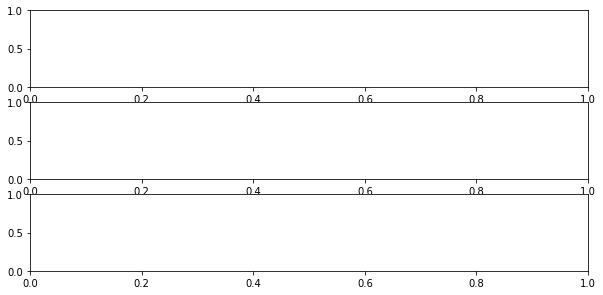

In [10]:
save_imgs(df_norm.iloc[1820:,:])